# Heritage Health End-to-end Machine Learning project

This notebook has been modified for the Heritage Health dataset from the Lab-End_to_end_Machine_Learning_Project-IU notebook.

## Phase-1 Updates:

Numerical Features in Focus: 

Categorical Features:Gender

Target Feature: Days in Hospital

### Major Developments:
* Load data
* Basic feature engineering
* Build a pipeline for linear regression

## Phase-2 Updates:
Numerical Features in Focus:
* 'LengthOfStay.daysCount'
* 'PayDelayCount'
* 'ProcedureGroup_EM'
* 'max_DrugCount'
* 'ClaimsTruncated'
* 'max_CharlsonIndexI'
* 'avg_DrugCount'
* 'PayDelaySum'
* 'Specialty_Diagnostic Imaging'
* 'avg_CharlsonIndexI'
* 'months_LabCount'
* 'Specialty_Internal'
* 'max_LOS'
* 'PlaceSvc_Office'
* 'ProcedureGroup_RAD'
* 'LabCountSum'
* 'max_PayDelay'
* 'Specialty_Emergency'
* 'avg_LOS','PlaceSvc_Inpatient Hospital'
* 'months_DrugCount'
* 'AgeI'
* 'ProcedureGroup_PL'
* 'max_dsfs'
* 'range_CharlsonIndexI'

Target Feature: Days in Hospital

### Major Developments: 
* Feature Pipeline
* Decision Tree
* Random Forest

## Phase-3 Updates:
Numerical Features in Focus: * 'LengthOfStay.daysCount'
* 'PayDelayCount'
* 'ProcedureGroup_EM'
* 'max_DrugCount'
* 'ClaimsTruncated'
* 'max_CharlsonIndexI'
* 'avg_DrugCount'
* 'PayDelaySum'
* 'Specialty_Diagnostic Imaging'
* 'avg_CharlsonIndexI'
* 'months_LabCount'
* 'Specialty_Internal'
* 'max_LOS'
* 'PlaceSvc_Office'
* 'ProcedureGroup_RAD'
* 'LabCountSum'
* 'max_PayDelay'
* 'Specialty_Emergency'
* 'avg_LOS','PlaceSvc_Inpatient Hospital'
* 'months_DrugCount'
* 'AgeI'
* 'ProcedureGroup_PL'
* 'max_dsfs'
* 'range_CharlsonIndexI'

Target Feature: Days in Hospital

### Major Developments:
* Feature Engineering
* Hyperparameter tuning - so much gridsearch!


## Phase-4 Updates:
New Features Considered:
* 'ProcedureGroup_ANES',
* 'ProcedureGroup_SMCD',
* 'PlaceSvc_Ambulance',
* 'PlaceSvc_Independent Lab',
* 'Specialty_Anesthesiology',
* 'Specialty_Diagnostic Imaging',
* 'Specialty_Emergency',
* 'Specialty_Laboratory',
* 'Specialty_Obstetrics and Gynecology',
* 'Specialty_Pathology',
* 'Specialty_Pediatrics',
* 'Specialty_Rehabilitation',
* 'PrimaryConditionGroup_APPCHOL',
* 'PrimaryConditionGroup_FXDISLC',
* 'PrimaryConditionGroup_GIOBSENT',
* 'PrimaryConditionGroup_GYNEC1',


Target Feature: Days in Hospital

### Major Developments:
* Model Selection
* Model Features selected via Gridsearch
* Success/Failure Analysis

# Importing needed Libraries

In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
from time import time
from collections import Counter

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Machine Learning
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge, SGDClassifier, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import FeatureUnion, Pipeline
from scipy.stats import randint
from scipy import sparse, stats
from sklearn.preprocessing import StandardScaler, Imputer, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, SVR
from sklearn.utils import check_array
from sklearn_pandas import CategoricalImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load Data

In [2]:
# Set the directory containing the raw data files
DATA_DIR = os.path.join('data/HHP_release3')

In [3]:
def load_health_data(data_path,filename):
    csv_path = os.path.join(data_path, filename)
    return pd.read_csv(csv_path)

# Preprocessing

The DataFrameSelector class is used in our pipeline to select the attributes.

In [4]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

The ttest function will be used to identify significance between our models.

In [5]:
def ttest(control, treatment):
    #paired t-test; two-tailed p-value      A   ,    B
    (t_score, p_value) = stats.ttest_rel(control, treatment)

    if p_value > 0.05/2:  #Two sided 
        print('There is no significant difference between the two machine learning pipelines (Accept H0)')
    else:
        print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )

    return p_value

# Load Provided Training Set

Here we are loading and exploring the provided training dataset.

In [6]:
train_X = load_health_data(DATA_DIR,'trainY2_Y3.csv')
train_X.head()

,MemberID,LabCountCount,LabCountMean,LabCountMax,LabCountMin,LabCountSum,PayDelayCount,PayDelayMean,PayDelayMax,PayDelayMin,...,PrimaryConditionGroup_RENAL2,PrimaryConditionGroup_RENAL3,PrimaryConditionGroup_RESPR4,PrimaryConditionGroup_ROAMI,PrimaryConditionGroup_SEIZURE,PrimaryConditionGroup_SEPSIS,PrimaryConditionGroup_SKNAUT,PrimaryConditionGroup_STROKE,PrimaryConditionGroup_TRAUMA,PrimaryConditionGroup_UTI
0,10001471,2,7.000000,9,5,14,12,71.583333,132,17,...,0,0,1,1,0,0,0,0,0,0
1,10002388,2,7.000000,8,6,14,41,58.731707,163,13,...,1,4,0,6,0,0,0,0,0,4
2,10003523,6,4.333333,8,1,26,38,40.526316,163,21,...,0,1,0,0,0,0,0,0,0,0
3,10004817,1,1.000000,1,1,1,15,62.333333,133,24,...,0,0,0,0,0,0,2,0,0,0
4,10008724,1,6.000000,6,6,6,6,68.500000,141,11,...,0,0,0,0,0,0,0,0,0,0


Make the Label LengthOfStay.daysSum

In [7]:
train_X_labels = train_X['DaysInHospital'].copy()
#train_X = train_X.drop(['DaysInHospital'], axis=1) 
# drop labels for training set

Check for any missing values:

In [8]:
sample_incomplete_rows = train_X[train_X.isnull().any(axis=1)].head()
sample_incomplete_rows

,MemberID,LabCountCount,LabCountMean,LabCountMax,LabCountMin,LabCountSum,PayDelayCount,PayDelayMean,PayDelayMax,PayDelayMin,...,PrimaryConditionGroup_RENAL2,PrimaryConditionGroup_RENAL3,PrimaryConditionGroup_RESPR4,PrimaryConditionGroup_ROAMI,PrimaryConditionGroup_SEIZURE,PrimaryConditionGroup_SEPSIS,PrimaryConditionGroup_SKNAUT,PrimaryConditionGroup_STROKE,PrimaryConditionGroup_TRAUMA,PrimaryConditionGroup_UTI


In [9]:
train_X['DaysInHospital'].value_counts(dropna=False).sort_index() 

0     87134
1      6629
2      3508
3      2374
4      1534
5       895
6       547
7       401
8       281
9       226
10      173
11      124
12      117
13      100
14       53
15      399
Name: DaysInHospital, dtype: int64

No missing values in the data, that's good!

In [10]:
train_X['LabCountCount'].value_counts(dropna=False).sort_index() 

1     46580
2     25232
3     14054
4      8125
5      4162
6      2317
7      1188
8       728
9       534
10      545
11      596
12      434
Name: LabCountCount, dtype: int64

In [11]:
train_X['PayDelayCount'].value_counts(dropna=False).sort_index()

1      763
2     3059
3     5646
4     6238
5     6406
6     6271
7     5835
8     5225
9     5032
10    4561
11    4174
12    3769
13    3379
14    3192
15    2884
16    2654
17    2499
18    2172
19    2010
20    1835
21    1733
22    1613
23    1484
24    1338
25    1351
26    1217
27    1136
28    1012
29     992
30     987
31     945
32     896
33     859
34     884
35     811
36     791
37     793
38     719
39     685
40     692
41     606
42     489
43    4858
Name: PayDelayCount, dtype: int64

In [12]:
train_X['LengthOfStay.daysCount'].value_counts(dropna=False).sort_index()

1      763
2     3059
3     5646
4     6238
5     6406
6     6271
7     5835
8     5225
9     5032
10    4561
11    4174
12    3769
13    3379
14    3192
15    2884
16    2654
17    2499
18    2172
19    2010
20    1835
21    1733
22    1613
23    1484
24    1338
25    1351
26    1217
27    1136
28    1012
29     992
30     987
31     945
32     896
33     859
34     884
35     811
36     791
37     793
38     719
39     685
40     692
41     606
42     489
43    4858
Name: LengthOfStay.daysCount, dtype: int64

In [13]:
train_X['ClaimsTruncated'].value_counts(dropna=False).sort_index()

0    96698
1     7797
Name: ClaimsTruncated, dtype: int64

## Create training set

The provided trianing set is called train_X with labels called train_X_labels corresponding to the DaysinHospital variable. 

In [14]:
df_target_Y2 = load_health_data(DATA_DIR, 'DaysInHospital_Y2.csv')
df_target_Y3 = load_health_data(DATA_DIR, 'DaysInHospital_Y3.csv')
df_target_Y4 = load_health_data(DATA_DIR, 'Target.csv')

In [15]:
df_target_Y2['ClaimsTruncated'].value_counts(dropna=False)

0    72067
1     3971
Name: ClaimsTruncated, dtype: int64

In [16]:
df_target_Y2['DaysInHospital'].value_counts(dropna=False)

0     64269
1      4835
2      2366
3      1453
4       977
5       565
6       373
15      261
7       256
8       173
9       148
10      106
11       80
12       73
13       61
14       42
Name: DaysInHospital, dtype: int64

The labels will be set up as the log of the DaysInHospital variable

In [17]:
df_target_Y2['label'] = np.log(df_target_Y2['DaysInHospital'] + 1)
df_target_Y2['Year'] = 'Y1'

df_target_Y3['label'] = np.log(df_target_Y3['DaysInHospital'] + 1)
df_target_Y3['Year'] = 'Y2'

df_target_Y4['label'] = np.log(df_target_Y4['DaysInHospital'] + 1)
df_target_Y4['Year'] = 'Y3'

In [18]:
df_target_Y2.head()

,MemberID,ClaimsTruncated,DaysInHospital,label,Year
0,24027423,0,0,0.000000,Y1
1,98324177,0,0,0.000000,Y1
2,33899367,1,1,0.693147,Y1
3,5481382,0,1,0.693147,Y1
4,69908334,0,0,0.000000,Y1


### Claims Data

In [19]:
df_claims = load_health_data(DATA_DIR, 'Claims.csv')

In [20]:
df_claims['PayDelay'].value_counts(dropna=False)

0       141451
162+     92592
28       87286
23       85165
29       83899
22       83380
24       82660
30       78784
21       78751
31       73889
35       70537
27       63693
36       60368
17       57018
16       56983
34       54340
37       54026
20       53773
38       48513
15       48435
42       43513
43       40619
44       36581
25       34889
45       32900
32       31582
41       30906
49       29986
50       29832
14       26861
         ...  
147       1405
155       1381
161       1381
123       1357
149       1338
132       1335
154       1306
157       1283
6         1271
150       1241
156       1218
139       1191
130       1154
110       1092
137       1008
146        929
153        925
160        917
117        913
144        844
158        812
151        808
124        725
131        594
138        593
159        508
145        481
152        457
2          269
1           94
Name: PayDelay, Length: 163, dtype: int64

In [21]:
df_claims['DSFS'].value_counts(dropna=False)

0- 1 month      707721
1- 2 months     247343
2- 3 months     225216
3- 4 months     212214
5- 6 months     192000
4- 5 months     189001
6- 7 months     180662
7- 8 months     175191
8- 9 months     171878
9-10 months     151527
10-11 months    116328
NaN              52770
11-12 months     47139
Name: DSFS, dtype: int64

The DSFS column is non-numeric and has some NaN values. This column will be added to the categorical pipeline and we will find the best way to handle the NaN values. 

In [22]:
df_claims['CharlsonIndex'].value_counts(dropna=False)

0      1356995
1-2    1256527
3-4      49479
5+        5989
Name: CharlsonIndex, dtype: int64

The 5+ category will have to be handled as a non-numeric character, the easiest solution might be to change it to 5.

In [23]:
df_claims['LengthOfStay'].value_counts(dropna=False)

NaN           2597392
1 day           56696
2 days           6485
3 days           3246
4 days           1473
1- 2 weeks       1143
2- 4 weeks        961
4- 8 weeks        903
5 days            510
6 days            179
26+ weeks           2
Name: LengthOfStay, dtype: int64

THe LengthOfStay variable is another that will be treated as categorical.

We're going to create a dictionary for our non-numeric variables and apply the dictionary to our dataset so that everything ends up numeric.

In [24]:
charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}

The ClaimAttributeAdder class is  going to do the necessary processing of our non-numeric variables.
PayDelay variables equal to '162+' will be changed to 163
DSFSI variables will be increased by 1 except the NaN values
CharlsonIndex variables will be converted to numeric values using the charlcon_idx_dt dictionary
LengthOfStay variables will be converted to numeric values using the los_dt dictionary above

In [25]:
# preprocess via pipeline
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):           
        X['PayDelayI'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else 163)
        X['DSFSI'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndexI'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStayI'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X

In [26]:
caa = ClaimAttributesAdder()
df_claims = caa.transform(df_claims)

Now lets see how the variables changed:

In [27]:
df_claims['PayDelayI'].value_counts(dropna=False)

0      141451
163     92592
28      87286
23      85165
29      83899
22      83380
24      82660
30      78784
21      78751
31      73889
35      70537
27      63693
36      60368
17      57018
16      56983
34      54340
37      54026
20      53773
38      48513
15      48435
42      43513
43      40619
44      36581
25      34889
45      32900
32      31582
41      30906
49      29986
50      29832
14      26861
        ...  
147      1405
155      1381
161      1381
123      1357
149      1338
132      1335
154      1306
157      1283
6        1271
150      1241
156      1218
139      1191
130      1154
110      1092
137      1008
146       929
153       925
160       917
117       913
144       844
158       812
151       808
124       725
131       594
138       593
159       508
145       481
152       457
2         269
1          94
Name: PayDelayI, Length: 163, dtype: int64

162+ has been changed to 163!

In [28]:
df_claims['DSFSI'].value_counts(dropna=False)

 1.0     707721
 2.0     410810
 3.0     225216
 4.0     212214
 6.0     192000
 5.0     189001
 7.0     180662
 8.0     175191
 9.0     171878
 10.0    151527
NaN       52770
Name: DSFSI, dtype: int64

This seems a little off, 2 should only be 247343, but out preprocessing seems to have added 1- 2 months with 10-11 months AND 11-12 months. Lets go back and look at this again once we check the other variables. Also note that we still have out NaN values.

In [29]:
df_claims['CharlsonIndexI'].value_counts(dropna=False)

0    1356995
2    1256527
4      49479
6       5989
Name: CharlsonIndexI, dtype: int64

The CharlsonIndex seems to have mapped perfectly and now our non-numeric variables are numeric.

In [30]:
df_claims['LengthOfStayI'].value_counts(dropna=False)

NaN       2597392
 1.0        56696
 2.0         6485
 3.0         3246
 4.0         1473
 11.0        1143
 21.0         961
 42.0         903
 5.0          510
 6.0          179
 180.0          2
Name: LengthOfStayI, dtype: int64

All the reference to days and weeks have been removed from the LengthOfStay variables, but we still have that NaN to deal with.

Lets go back and to correct the DSFS.

In [31]:
df_claims['DSFSI'] = df_claims['DSFS'].apply(lambda x: None if pd.isnull(x) else 10 if int(x[3:5]=='0 ') else int(x[3:5]))

In [32]:
df_claims['DSFSI'].value_counts(dropna=False)

 1.0     707721
 2.0     247343
 3.0     225216
 4.0     212214
 6.0     192000
 5.0     189001
 7.0     180662
 8.0     175191
 9.0     171878
 10.0    151527
 11.0    116328
NaN       52770
 12.0     47139
Name: DSFSI, dtype: int64

That looks better, lets update our preprocessing.

In [33]:
# preprocess via pipeline
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):           
        X['PayDelayI'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else 163)
        X['DSFSI'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else 10 if int(x[3:5]=='0 ') else int(x[3:5]))
        X['CharlsonIndexI'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStayI'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X

In [34]:
caa = ClaimAttributesAdder()
df_claims = caa.transform(df_claims)

In [35]:
df_claims.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS,PayDelayI,DSFSI,CharlsonIndexI,LengthOfStayI
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0,28,9.0,0,NaN
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0,50,8.0,2,NaN
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,NaN,0- 1 month,METAB3,0,EM,0,14,1.0,0,NaN
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,NaN,5- 6 months,METAB3,1-2,SCS,0,24,6.0,2,NaN
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0,27,5.0,2,NaN


In [36]:
agg_op_dt_claim = {
    'PayDelayI': {
        'max_PayDelay': 'max',
        'min_PayDelay': 'min',
        'avg_PayDelay': 'mean'
    },
    'LengthOfStayI': {
        'max_LOS': 'max',
        'min_LOS': 'min',
        'avg_LOS': 'mean'
    },
    'DSFSI': {
        'max_dsfs': 'max',
        'min_dsfs': 'min',
        'avg_dsfs': 'mean'
    },
    'CharlsonIndexI': {
        'max_CharlsonIndexI': 'max',
        'min_CharlsonIndexI': 'min',
        'avg_CharlsonIndexI': 'mean'
    }
}

In [37]:
# Aggregate via pipeline
class ClaimAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):           
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_claim)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        result['range_dsfs'] = result['max_dsfs'] - result['min_dsfs']
        result['range_CharlsonIndexI'] = result['max_CharlsonIndexI'] - result['min_CharlsonIndexI']
        return result

In [38]:
claim_pipeline = Pipeline([
    ('claim_adder', ClaimAttributesAdder()),
    ('claim_aggregater', ClaimAggregater())
    ])
df_claims_aggregated = claim_pipeline.transform(df_claims)

c:\users\tiffany.fabianac\appdata\local\programs\python\python36\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [39]:
df_claims_aggregated.head()

,Year,MemberID,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,avg_LOS,max_dsfs,min_dsfs,avg_dsfs,max_CharlsonIndexI,min_CharlsonIndexI,avg_CharlsonIndexI,range_dsfs,range_CharlsonIndexI
0,Y1,210,163,22,90.250000,2.0,2.0,2.0,10.0,1.0,3.500000,0,0,0.000000,9.0,0
1,Y1,3197,163,36,98.800000,NaN,NaN,NaN,12.0,1.0,6.600000,0,0,0.000000,11.0,0
2,Y1,3889,163,33,70.769231,2.0,1.0,1.5,2.0,1.0,1.076923,2,0,0.615385,1.0,2
3,Y1,4187,163,29,85.250000,NaN,NaN,NaN,9.0,1.0,3.750000,0,0,0.000000,8.0,0
4,Y1,9063,68,39,60.250000,NaN,NaN,NaN,2.0,1.0,1.250000,0,0,0.000000,1.0,0


## Drug Data

In [40]:
df_drug_count = load_health_data(DATA_DIR, 'DrugCount.csv')

The DrugCount csv contains MemberID, Year, DSFS, and DrugCount variables. THe only variable we need from this sheet in DrugCount.

In [41]:
df_drug_count['DrugCount'].value_counts(dropna=False)

1     263501
2     188559
3     129881
4      87783
5      57768
7+     54018
6      36731
Name: DrugCount, dtype: int64

We just have to get rid of that 7+ variable... Lets change it to 7.

In [42]:
# preprocess via pipeline
class DrugAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):           
        X['DrugCountI'] = X['DrugCount'].apply(lambda x: 7 if x == '7+' else int(x))
        return X

In [43]:
daa = DrugAttributesAdder()
df_drug_count = daa.transform(df_drug_count)

In [44]:
df_drug_count.head()

,MemberID,Year,DSFS,DrugCount,DrugCountI
0,48925661,Y2,9-10 months,7+,7
1,90764620,Y3,8- 9 months,3,3
2,61221204,Y1,2- 3 months,1,1
3,63628544,Y3,1- 2 months,1,1
4,46949606,Y2,10-11 months,3,3


This is a great headshot where we can see that the 7+ has been changed to 7.

In [45]:
agg_op_dt_drug = {
    'DrugCountI': {
        'max_DrugCount': 'max',
        'min_DrugCount': 'min',
        'avg_DrugCount': 'mean',
        'months_DrugCount': 'count'
    }
}

In [46]:
# Aggregate via pipeline
class DrugAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):           
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_drug)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        return result

In [47]:
drug_pipeline = Pipeline([
    ('drug_adder', DrugAttributesAdder()),
    ('drug_aggregater', DrugAggregater())
    ])
df_drug_count_aggregated = drug_pipeline.transform(df_drug_count)

c:\users\tiffany.fabianac\appdata\local\programs\python\python36\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [48]:
df_drug_count_aggregated.head()

,Year,MemberID,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount
0,Y1,210,2,1,1.666667,3
1,Y1,3197,2,1,1.250000,4
2,Y1,3889,5,2,3.000000,10
3,Y1,4187,7,3,6.100000,10
4,Y1,9063,1,1,1.000000,2


### Lab Data

In [49]:
df_lab_count = load_health_data(DATA_DIR, 'LabCount.csv')

The LabCount csv contains MemberID, Year, DSFS, and LabCount variables. Similar to the DrugCount CSV, the only variable we need from this sheet is LabCount.

In [50]:
df_lab_count['LabCount'].value_counts(dropna=False)

1      93744
2      54183
3      43472
4      38815
5      34900
6      27705
10+    23110
7      20591
8      14885
9      10079
Name: LabCount, dtype: int64

The 10+ variable will need to be changed, lets change it to 10.

In [51]:
# preprocess via pipeline
class LabAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):           
        X['LabCountI'] = X['LabCount'].apply(lambda x: 10 if x == '10+' else int(x))
        return X

In [52]:
laa = LabAttributesAdder()
df_lab_count = laa.transform(df_lab_count)

In [53]:
df_lab_count.head()

,MemberID,Year,DSFS,LabCount,LabCountI
0,69258001,Y3,2- 3 months,1,1
1,10143167,Y1,0- 1 month,2,2
2,1054357,Y1,0- 1 month,6,6
3,56583841,Y3,6- 7 months,4,4
4,70967047,Y2,0- 1 month,2,2


In [54]:
agg_op_dt_lab = {
    'LabCountI': {
        'max_LabCount': 'max',
        'min_LabCount': 'min',
        'avg_LabCount': 'mean',
        'months_LabCount': 'count'
    }
}

In [55]:
# Aggregate via pipeline
class LabAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):           
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_lab)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        return result

In [56]:
lab_pipeline = Pipeline([
    ('lab_adder', LabAttributesAdder()),
    ('lab_aggregater', LabAggregater())
    ])
df_lab_count_aggregated = lab_pipeline.transform(df_lab_count)

c:\users\tiffany.fabianac\appdata\local\programs\python\python36\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [57]:
df_lab_count_aggregated.head()

,Year,MemberID,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
0,Y1,210,2,2,2.0,1
1,Y1,3889,10,10,10.0,1
2,Y1,11951,3,3,3.0,1
3,Y1,14661,2,2,2.0,1
4,Y1,14778,2,2,2.0,1


### Member Data

In [58]:
df_members = load_health_data(DATA_DIR, 'Members.csv')

The Member csv contains the MemberID, AgeAtFirstClaim, and Sex.

In [59]:
df_members['AgeAtFirstClaim'].value_counts(dropna=False)

40-49    16111
70-79    14514
50-59    13329
60-69    12622
30-39    12435
10-19    11319
0-9      10791
20-29     8505
80+       7621
NaN       5753
Name: AgeAtFirstClaim, dtype: int64

We're going to make a dictionary for the age range so that we can turn it into a numerical value.

In [60]:
age_dt = {'40-49': 45, '70-79': 75, '50-59': 55, '60-69': 65, '30-39': 35,
          '10-19': 15, '0-9': 5, '20-29': 25, '80+': 85}

In [61]:
class MemberAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):           
        X['AgeI'] = X['AgeAtFirstClaim'].apply(lambda x: None if pd.isnull(x) else age_dt[x])
        return X

In [62]:
maa = MemberAttributesAdder()
df_members = maa.transform(df_members)

In [63]:
df_members.head()

,MemberID,AgeAtFirstClaim,Sex,AgeI
0,14723353,70-79,M,75.0
1,75706636,70-79,M,75.0
2,17320609,70-79,M,75.0
3,69690888,40-49,M,45.0
4,33004608,0-9,M,5.0


### Time for the Merge

Now we'll merge all our data together by MemberID

In [64]:
# 1. Union Target DataFrames Across Years
df_merged = pd.concat([df_target_Y2, df_target_Y3])
print(df_merged.shape)
# 2. Join/Merge in Members Data
df_merged = df_merged.merge(df_members, how='left', on='MemberID')
print(df_merged.shape)
# 3. Join/Merge in Aggregated Claims Data
df_merged = df_merged.merge(df_claims_aggregated, how='left', on=['MemberID', 'Year'])
print(df_merged.shape)
# 4. Join/Merge in Aggregated Drug Data
df_merged = df_merged.merge(df_drug_count_aggregated, how='left', on=['MemberID', 'Year'])
print(df_merged.shape)
# 5. Join/Merge in Aggregated Lab Data
df_merged = df_merged.merge(df_lab_count_aggregated, how='left', on=['MemberID', 'Year'])
print(df_merged.shape)

(147473, 5)
(147473, 8)
(147473, 22)
(147473, 26)
(147473, 30)


In [65]:
df_final = df_merged.drop(['MemberID', 'DaysInHospital', 'Year', 'AgeAtFirstClaim'], axis=1)
df_final.shape

(147473, 26)

In [66]:
df_final.head()

,ClaimsTruncated,label,Sex,AgeI,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,avg_LOS,...,range_dsfs,range_CharlsonIndexI,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
0,0,0.000000,M,35.0,35,27,30.400000,NaN,NaN,NaN,...,2.0,4,3.0,3.0,3.000000,1.0,7.0,7.0,7.000000,1.0
1,0,0.000000,M,35.0,146,23,70.666667,NaN,NaN,NaN,...,0.0,0,1.0,1.0,1.000000,1.0,7.0,7.0,7.000000,1.0
2,1,0.693147,F,85.0,163,13,45.024390,NaN,NaN,NaN,...,10.0,0,6.0,1.0,2.300000,10.0,1.0,1.0,1.000000,1.0
3,0,0.693147,F,25.0,163,28,68.166667,NaN,NaN,NaN,...,9.0,0,2.0,1.0,1.111111,9.0,2.0,1.0,1.666667,3.0
4,0,0.000000,F,65.0,77,22,48.117647,NaN,NaN,NaN,...,9.0,0,4.0,1.0,1.777778,9.0,8.0,8.0,8.000000,1.0


### EDA

A correlation matrix will show if any linear correlation exist between the label and the other variables. Even if a linear correlation exists, it does not mean that the relationship is meaning full.

Lets first check out the provided training dataset:

In [67]:
corr_matrix = train_X.corr()
corr_matrix["DaysInHospital"].sort_values(ascending=False)

DaysInHospital                         1.000000
PayDelayCount                          0.188604
LengthOfStay.daysCount                 0.188604
ProcedureGroup_EM                      0.175871
ClaimsTruncated                        0.169226
PayDelaySum                            0.160035
Specialty_Internal                     0.143302
LabCountSum                            0.139105
Specialty_Diagnostic Imaging           0.138110
PlaceSvc_Office                        0.133845
ProcedureGroup_RAD                     0.125355
LabCountCount                          0.124395
ProcedureGroup_PL                      0.123854
PlaceSvc_Independent Lab               0.114570
Specialty_Laboratory                   0.114378
PlaceSvc_Inpatient Hospital            0.111679
Specialty_Emergency                    0.110535
ProcedureGroup_MED                     0.095289
PlaceSvc_Urgent Care                   0.094912
ProcedureGroup_SCS                     0.094130
PayDelayMax                            0

In [68]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(train_X, train_X_labels)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False  True  True False  True False False False False
 False False False False False False False  True False False False False
 False  True False  True False False False False False False  True  True
  True False False  True  True False  True  True  True False False False
  True False False False False False False False False  True False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
[55 12 13 24 25 33 27 52 53 51 54  6 61 31 87 32  1  1 75  1 21 20 15 17
 57 16 18 68 59 19 71  1 65 86 70 67 63  1 62  1  9 11  8 10  7 73  1  1
  1  3  4  1  1  5  1  1  1  2 60 42  1 44 66 48 85 80 58 46 64  1 29  1
  1 56 47 37 43 74 22 77 79 49 39 76 36 50 34 26 84 78 83 69 28 81 23 38
 40 35 41 82 45 72 30 14]


In [69]:
#Variables marked as important:
[
 'ClaimsTruncated',
 'DaysInHospital',
 'ProcedureGroup_ANES',
 'ProcedureGroup_SMCD',
 'PlaceSvc_Ambulance',
 'PlaceSvc_Independent Lab',
 'Specialty_Anesthesiology',
 'Specialty_Diagnostic Imaging',
 'Specialty_Emergency',
 'Specialty_Laboratory',
 'Specialty_Obstetrics and Gynecology',
 'Specialty_Pathology',
 'Specialty_Pediatrics',
 'Specialty_Rehabilitation',
 'PrimaryConditionGroup_APPCHOL',
 'PrimaryConditionGroup_FXDISLC',
 'PrimaryConditionGroup_GIOBSENT',
  'PrimaryConditionGroup_GYNEC1',
]

['ClaimsTruncated',
 'DaysInHospital',
 'ProcedureGroup_ANES',
 'ProcedureGroup_SMCD',
 'PlaceSvc_Ambulance',
 'PlaceSvc_Independent Lab',
 'Specialty_Anesthesiology',
 'Specialty_Diagnostic Imaging',
 'Specialty_Emergency',
 'Specialty_Laboratory',
 'Specialty_Obstetrics and Gynecology',
 'Specialty_Pathology',
 'Specialty_Pediatrics',
 'Specialty_Rehabilitation',
 'PrimaryConditionGroup_APPCHOL',
 'PrimaryConditionGroup_FXDISLC',
 'PrimaryConditionGroup_GIOBSENT',
 'PrimaryConditionGroup_GYNEC1']

In [70]:
given_final = train_X.loc[:, train_X.columns.intersection([
 'ClaimsTruncated',
 'DaysInHospital',
 'ProcedureGroup_ANES',
 'ProcedureGroup_SMCD',
 'PlaceSvc_Ambulance',
 'PlaceSvc_Independent Lab',
 'Specialty_Anesthesiology',
 'Specialty_Diagnostic Imaging',
 'Specialty_Emergency',
 'Specialty_Laboratory',
 'Specialty_Obstetrics and Gynecology',
 'Specialty_Pathology',
 'Specialty_Pediatrics',
 'Specialty_Rehabilitation',
 'PrimaryConditionGroup_APPCHOL',
 'PrimaryConditionGroup_FXDISLC',
 'PrimaryConditionGroup_GIOBSENT',
  'PrimaryConditionGroup_GYNEC1',
])] 

In [71]:
given_final.head()

,ClaimsTruncated,DaysInHospital,ProcedureGroup_ANES,ProcedureGroup_SMCD,PlaceSvc_Ambulance,PlaceSvc_Independent Lab,Specialty_Anesthesiology,Specialty_Diagnostic Imaging,Specialty_Emergency,Specialty_Laboratory,Specialty_Obstetrics and Gynecology,Specialty_Pathology,Specialty_Pediatrics,Specialty_Rehabilitation,PrimaryConditionGroup_APPCHOL,PrimaryConditionGroup_FXDISLC,PrimaryConditionGroup_GIOBSENT,PrimaryConditionGroup_GYNEC1
0,0,0,0,0,0,4,0,1,0,4,0,0,0,0,0,0,0,0
1,1,0,0,0,0,3,0,7,7,3,0,0,0,0,0,0,0,0
2,1,0,0,0,0,24,0,3,2,24,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,5,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,1,0,2,0,0,0,0,0,0,0,0


And how about the dataset we've created:

In [72]:
corr_matrix = df_final.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
max_DrugCount           0.173162
ClaimsTruncated         0.167734
max_CharlsonIndexI      0.161397
avg_DrugCount           0.157510
avg_CharlsonIndexI      0.151023
AgeI                    0.146692
months_LabCount         0.135606
months_DrugCount        0.135003
max_dsfs                0.133960
range_dsfs              0.133305
avg_dsfs                0.132384
range_CharlsonIndexI    0.120726
max_PayDelay            0.111533
min_CharlsonIndexI      0.102417
max_LabCount            0.095338
max_LOS                 0.078603
avg_LOS                 0.065573
min_DrugCount           0.061915
min_LOS                 0.034003
avg_LabCount            0.033287
min_dsfs                0.026847
avg_PayDelay           -0.004347
min_LabCount           -0.025444
min_PayDelay           -0.071329
Name: label, dtype: float64

There are a a lot of differences but right off the bat I see that ClaimsTruncated is close to the top for both. 

Lets see what mixing up the features does.

In [74]:
# column index
LabCountSum, PayDelayCount,Specialty_Emergency, payDelaySum, lengthofStay  = 0, 1, 6, 2, 3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_delay_per_stay = True): # no *args or **kargs
        self.add_delay_per_stay = add_delay_per_stay
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        if lengthofStay == 0:
            lab_per_stay = 0
        else:
            lab_per_stay = X[:, LabCountSum] / X[:, lengthofStay]
        if Specialty_Emergency == 0:
            lab_per_SpE = 0
        else:
            lab_per_SpE = X[:, LabCountSum] / X[:, Specialty_Emergency]
        if self.add_delay_per_stay:
            if lengthofStay == 0:
                delay_per_stay = 0
            else:
                delay_per_stay = X[:, PayDelayCount] / X[:, lengthofStay]
            data = [X, lab_per_stay, lab_per_SpE,
                         delay_per_stay]
            return pd.DataFrame(data)
        else:
            data = [X, lab_per_stay, lab_per_SpE]
            return pd.DataFrame(data)

attr_adder = CombinedAttributesAdder(add_delay_per_stay=True)
extra_attribs = attr_adder.transform(train_X.values)

## Split into train and test

In [75]:
df_train, df_other = train_test_split(df_final, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_other, test_size=0.5, random_state=42)

In [76]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(103231, 26)
(22121, 26)
(22121, 26)


In [77]:
lab_enc = preprocessing.LabelEncoder()

y_train = lab_enc.fit_transform(df_train['label'])
y_val = lab_enc.fit_transform(df_val['label'])
y_test = lab_enc.fit_transform(df_test['label'])

## Create Feature Pipeline

In [80]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [81]:
# Identify the numeric features we wish to consider. 
num_attribs = ['ClaimsTruncated', 'AgeI', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay',
       'min_LOS', 'avg_LOS', 'max_LOS', 'avg_dsfs', 
       'min_DrugCount', 'months_DrugCount',
       'max_DrugCount', 'avg_LabCount', 'max_LabCount', 'months_LabCount',
       'min_LabCount']

# Create a pipeline for the numeric features.
# Missing values will be imputed using the feature median.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = [
    'Sex'
]

# Identiy the range of expected values for the categorical features.
cat_values = [
    ['Sex_f', 'Sex_male']  # Sex
]

# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
#   defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', CategoricalImputer()),
        ('cat_encoder', CategoricalEncoder(categories=cat_values, encoding="onehot-dense", handle_unknown="ignore"))
    ])

# Union the transformed, scaled numeric and categorical features.
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

## Run the Pipeline

In [82]:
X_train = full_pipeline.fit_transform(df_train)
X_val = full_pipeline.fit_transform(df_val)
X_test = full_pipeline.fit_transform(df_test)

## Run pipeline to produce random prediction

The max label in our created training set is 2.772589 and the max in the dataset provided is 15. Lets create some random prediction for both to complare our models to. 

In [83]:
rand_pred_train = lab_enc.fit_transform((np.log(np.random.randint(0,15,np.size(y_train)) + 1)))
rand_train_mse = np.sqrt(mean_squared_error(y_train, rand_pred_train))

rand_pred_test = lab_enc.fit_transform((np.log(np.random.randint(0,15,np.size(y_val)) + 1)))
rand_test_mse = np.sqrt(mean_squared_error(y_val, rand_pred_test))

results = pd.DataFrame(columns=["ExpID", "Train MSE", "Test MSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])
results.loc[0] = ["Random Prediction", round(rand_train_mse, 4), round(rand_test_mse, 4), "---", "< 1s", "< 1s", "Numpy Random"]

In [84]:
results

,ExpID,Train MSE,Test MSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Random Prediction,7.9917,8.0412,---,< 1s,< 1s,Numpy Random


## Training Linear Models

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr = lr.predict(X_train)
score_train_lr = np.sqrt(mean_squared_error(y_train, pred_train_lr))
pred_test_lr = lr.predict(X_val)
score_test_lr = np.sqrt(mean_squared_error(y_val, pred_test_lr))

Visualize what the model is predicting compared to the real labels:

In [86]:
some_data = X_train[1:6]
some_labels = y_train[1:6]

print("Predictions:", lr.predict(some_data))

Predictions: [0.23089028 0.87307205 0.56283707 0.34170092 0.38428698]


Compare against the actual values:

In [87]:
print("Labels:", list(some_labels))

Labels: [0, 0, 0, 0, 2]


Model variables and coefficients

In [88]:
cat_attr = [e for c in cat_values for e in c]
lr_model = dict(zip(num_attribs + cat_attr, lr.coef_))
lr_model

{'ClaimsTruncated': 0.16935928123889651,
 'AgeI': 0.10602581405905498,
 'min_PayDelay': 0.02313625558964999,
 'max_PayDelay': 0.08743422352347408,
 'avg_PayDelay': -0.06252867992873602,
 'min_LOS': 0.018261609190561953,
 'avg_LOS': -0.1025912504324884,
 'max_LOS': 0.16026840229268038,
 'avg_dsfs': 0.04639462569238757,
 'min_DrugCount': 0.020981735835525057,
 'months_DrugCount': -0.03009258612962725,
 'max_DrugCount': 0.11512339561045665,
 'avg_LabCount': 0.04275758002150633,
 'max_LabCount': 0.01323644882002109,
 'months_LabCount': 0.0032155464925388566,
 'min_LabCount': -0.03847789657126113,
 'Sex_f': 0.0,
 'Sex_male': 0.0}

In [89]:
train_X_predictions = lr.predict(X_train)
lr_mse = mean_squared_error(y_train, train_X_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

1.5444407587943665

An RMSE above 0.5 is not a good indication of the model fit.

In [90]:
lr_mae = mean_absolute_error(y_train, train_X_predictions)
lr_mae

0.7268823221694715

### Bulk Train Linear Models

In [91]:
#Lasso, LinearRegression, LogisticRegression, Ridge, SGDClassifier
regressors = [
    ('Linear', LinearRegression()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('ElasticNet', ElasticNet()),
    ('SGD', SGDClassifier(max_iter=3, tol=None)),
    ('Logistic', LogisticRegression()),
]

for idx, (name, regressor) in enumerate(regressors, 1):
    regressor.fit(X_train, y_train)
    t0 = time()
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    reg_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    reg_score_train = np.sqrt(-1*reg_scores).mean()
    t1 = time()
    pred_test_reg = regressor.predict(X_val)
    score_test_reg = np.sqrt(mean_squared_error(y_val, pred_test_reg))
    t2 = time()

    time_train = round(t1 - t0, 4)
    time_test = round(t2 - t1, 4)

    p_value = ttest(rand_pred_test, pred_test_reg)
    results.loc[idx] = ['Baseline ' + name, round(reg_score_train, 4), round(score_test_reg, 4), round(p_value, 4), time_train, time_test, 'Default parameters']



The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (227.27, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (227.97, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (227.27, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (227.97, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (243.23, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (243.58, 0.00000)


In [92]:
results

,ExpID,Train MSE,Test MSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Random Prediction,7.9917,8.0412,---,< 1s,< 1s,Numpy Random
1,Baseline Linear,1.5469,1.4917,0,2.9296,0.0156,Default parameters
2,Baseline Lasso,1.5851,1.5342,0,2.1854,0,Default parameters
3,Baseline Ridge,1.5469,1.4917,0,1.758,0.002,Default parameters
4,Baseline ElasticNet,1.5851,1.5342,0,2.2822,0,Default parameters
5,Baseline SGD,1.6658,1.5989,0,20.1438,0.0156,Default parameters
6,Baseline Logistic,1.6503,1.5962,0,261.325,0.0156,Default parameters


This is pretty terrible.

## Train a Decision Tree Regressor
Train on the training  data and test on the training data (to verify pipelines are working)

In [93]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [94]:
train_X_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, train_X_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.23439024608372871

### Error on the TRAINING data
Oh! an RMSE < 0.5 is a good sign, maybe something exciting is coming! Lets compare to the linear models and the random prediction.

In [95]:
regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)
t0 = time()
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
reg_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
reg_score_train = np.sqrt(-1*reg_scores).mean()
t1 = time()
pred_test_reg = regressor.predict(X_val)
score_test_reg = np.sqrt(mean_squared_error(y_val, pred_test_reg))
t2 = time()

time_train = round(t1 - t0, 4)
time_test = round(t2 - t1, 4)

p_value = ttest(rand_pred_test, pred_test_reg)
results.loc[7] = ['DecisionTree', round(reg_score_train, 4), round(score_test_reg, 4), round(p_value, 4), time_train, time_test, 'random_state=42']



The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (206.94, 0.00000)


In [96]:
results

,ExpID,Train MSE,Test MSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Random Prediction,7.9917,8.0412,---,< 1s,< 1s,Numpy Random
1,Baseline Linear,1.5469,1.4917,0,2.9296,0.0156,Default parameters
2,Baseline Lasso,1.5851,1.5342,0,2.1854,0,Default parameters
3,Baseline Ridge,1.5469,1.4917,0,1.758,0.002,Default parameters
4,Baseline ElasticNet,1.5851,1.5342,0,2.2822,0,Default parameters
5,Baseline SGD,1.6658,1.5989,0,20.1438,0.0156,Default parameters
6,Baseline Logistic,1.6503,1.5962,0,261.325,0.0156,Default parameters
7,DecisionTree,2.3013,2.2947,0,20.9996,0.0156,random_state=42


## Linear Models for the Given Dataset

In [97]:
given_final['label'] = np.log(given_final['DaysInHospital'] + 1)
given_final = given_final.drop(['DaysInHospital'], axis=1)
given_final.shape

(104495, 18)

In [98]:
given_final.head()

,ClaimsTruncated,ProcedureGroup_ANES,ProcedureGroup_SMCD,PlaceSvc_Ambulance,PlaceSvc_Independent Lab,Specialty_Anesthesiology,Specialty_Diagnostic Imaging,Specialty_Emergency,Specialty_Laboratory,Specialty_Obstetrics and Gynecology,Specialty_Pathology,Specialty_Pediatrics,Specialty_Rehabilitation,PrimaryConditionGroup_APPCHOL,PrimaryConditionGroup_FXDISLC,PrimaryConditionGroup_GIOBSENT,PrimaryConditionGroup_GYNEC1,label
0,0,0,0,0,4,0,1,0,4,0,0,0,0,0,0,0,0,0.0
1,1,0,0,0,3,0,7,7,3,0,0,0,0,0,0,0,0,0.0
2,1,0,0,0,24,0,3,2,24,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,1,0,5,0,1,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,2,0,1,0,2,0,0,0,0,0,0,0,0,0.0


In [99]:
given_train, given_other = train_test_split(given_final, test_size=0.3, random_state=42)
given_val, given_test = train_test_split(given_other, test_size=0.5, random_state=42)

In [100]:
y_given_train = lab_enc.fit_transform(given_train['label'])
y_given_val = lab_enc.fit_transform(given_val['label'])
y_given_test = lab_enc.fit_transform(given_test['label'])

In [101]:
X_given_train = given_train.drop(['label'], axis=1)
X_given_val = given_val.drop(['label'], axis=1)
X_given_test = given_test.drop(['label'], axis=1)

In [102]:
rand_pred_train = lab_enc.fit_transform((np.log(np.random.randint(0,15,np.size(y_given_train)) + 1)))
rand_train_mse = np.sqrt(mean_squared_error(y_given_train, rand_pred_train))

rand_pred_test = lab_enc.fit_transform((np.log(np.random.randint(0,15,np.size(y_given_val)) + 1)))
rand_test_mse = np.sqrt(mean_squared_error(y_given_val, rand_pred_test))

results = pd.DataFrame(columns=["ExpID", "Train MSE", "Test MSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])
results.loc[0] = ["Random Prediction", round(rand_train_mse, 4), round(rand_test_mse, 4), "---", "< 1s", "< 1s", "Numpy Random"]

In [103]:
results

,ExpID,Train MSE,Test MSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Random Prediction,7.993,7.9449,---,< 1s,< 1s,Numpy Random


In [104]:
regressors = [
    ('Linear', LinearRegression()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('ElasticNet', ElasticNet()),
    ('SGD', SGDClassifier(max_iter=3, tol=None)),
    ('Logistic', LogisticRegression()),
]

for idx, (name, regressor) in enumerate(regressors, 1):
    regressor.fit(X_given_train, y_given_train)
    t0 = time()
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    reg_scores = cross_val_score(regressor, X_given_train, y_given_train, cv=cv, scoring='neg_mean_squared_error')
    reg_score_train = np.sqrt(-1*reg_scores).mean()
    t1 = time()
    pred_test_reg = regressor.predict(X_given_val)
    score_test_reg = np.sqrt(mean_squared_error(y_given_val, pred_test_reg))
    t2 = time()

    time_train = round(t1 - t0, 4)
    time_test = round(t2 - t1, 4)

    p_value = ttest(rand_pred_test, pred_test_reg)
    results.loc[idx] = ['Baseline ' + name, round(reg_score_train, 4), round(score_test_reg, 4), round(p_value, 4), time_train, time_test, 'Default parameters']


The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (187.41, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (188.25, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (187.41, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (188.17, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (203.35, 0.00000)
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (203.37, 0.00000)


In [105]:
results

,ExpID,Train MSE,Test MSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Random Prediction,7.9930,7.9449,---,< 1s,< 1s,Numpy Random
1,Baseline Linear,1.6812,1.7480,0,1.8622,0,Default parameters
2,Baseline Lasso,1.7178,1.7947,0,1.3718,0,Default parameters
3,Baseline Ridge,1.6812,1.7480,0,1.3386,0,Default parameters
4,Baseline ElasticNet,1.7102,1.7852,0,5.8784,0.0156,Default parameters
5,Baseline SGD,1.9315,1.8767,0,12.3552,0.0156,Default parameters
6,Baseline Logistic,1.7952,1.8756,0,113.738,0.0156,Default parameters


In [ ]:
from sklearn import model_selection
names = list(X_given_train)
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_given_train, y_given_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Objective evaluation via  K-fold crossfold validation

In [374]:
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [375]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2.2229349  2.31234559 2.34036345 2.30867837 2.27025803 2.20212301
 2.26568697 2.31469845 2.29108991 2.22962475]
Mean: 2.2757803413629163
Standard deviation: 0.04338205908209473


### Minimize MSE is equivalent to maximizing (-MSE)
Grid search will use cross_val_score based on maximizing a utility performance measure. So we maximize(-MSE) here.

In [377]:
lin_scores = cross_val_score(lr, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.57017111 1.51125749 1.61446655 1.5538616  1.57988286 1.49477792
 1.53853761 1.53050832 1.54554827 1.50923342]
Mean: 1.5448245157854423
Standard deviation: 0.034563497088910294


In [379]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [382]:
trainY2_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, trainY2_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.7381220713513715

In [383]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1.71388463 1.65803682 1.73515516 1.7002682  1.71365027 1.62683294
 1.65994911 1.66556663 1.6659297  1.63417111]
Mean: 1.6773444578575716
Standard deviation: 0.03446827470443095


In [384]:
scores = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      1.544825
std       0.036433
min       1.494778
25%       1.516070
50%       1.542043
75%       1.566094
max       1.614467
dtype: float64

In [385]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [386]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

Because the max estimator is our set max of 30 we should probably run again with higher values.

In [387]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [397]:
num_attribs

['ClaimsTruncated',
 'AgeI',
 'min_PayDelay',
 'max_PayDelay',
 'avg_PayDelay',
 'min_LOS',
 'avg_LOS',
 'max_LOS',
 'avg_dsfs',
 'min_DrugCount',
 'months_DrugCount',
 'max_DrugCount',
 'avg_LabCount',
 'max_LabCount',
 'months_LabCount',
 'min_LabCount']

In [416]:
sortedFeatures = sorted(zip(grid_search.best_estimator_.feature_importances_,num_attribs), reverse=False)
sortedFeatures

[(0.004936310825153033, 'min_LOS'),
 (0.00862502353959566, 'max_LOS'),
 (0.012443914967679576, 'avg_LOS'),
 (0.01882606721105323, 'ClaimsTruncated'),
 (0.031161737939850158, 'min_DrugCount'),
 (0.038001144630625636, 'min_LabCount'),
 (0.04775971798408856, 'months_LabCount'),
 (0.050251979043986435, 'max_LabCount'),
 (0.05025505574995035, 'max_DrugCount'),
 (0.06699240750747841, 'AgeI'),
 (0.07017659789415448, 'months_DrugCount'),
 (0.07789501574363221, 'avg_LabCount'),
 (0.0999365281233156, 'max_PayDelay'),
 (0.12152368107045872, 'min_PayDelay'),
 (0.14157657582605598, 'avg_dsfs'),
 (0.15963824194292203, 'avg_PayDelay')]

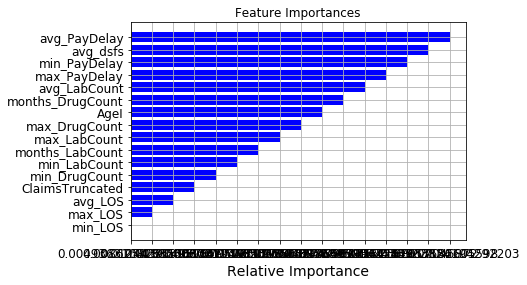

In [417]:
# Plot the feature importances of the forest
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure() 
plt.title("Feature importances")
sortedNames = np.array(sortedFeatures)[:, 1]
sortedImportances = np.array(sortedFeatures)[:, 0]

plt.title('Feature Importances')
plt.barh(range(len(sortedNames)), sortedImportances, color='b', align='center')
plt.yticks(range(len(sortedNames)), sortedNames)
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

### RandomizedSearchCV

In [406]:
param_distribs = {
        'n_estimators': randint(low=1, high=50),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000003420E438>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000003420E550>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [410]:
rnd_search.best_params_

{'max_features': 5, 'n_estimators': 36}

In [411]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=36, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [420]:
sortedFeatures = sorted(zip(rnd_search.best_estimator_.feature_importances_,num_attribs), reverse=False)
sortedFeatures

[(0.004720092930944332, 'min_LOS'),
 (0.007734659751156816, 'max_LOS'),
 (0.012581080997258924, 'avg_LOS'),
 (0.01851072898053474, 'ClaimsTruncated'),
 (0.029261338131732182, 'min_DrugCount'),
 (0.04114246552012518, 'min_LabCount'),
 (0.04650339723420902, 'months_LabCount'),
 (0.04749898368456347, 'max_DrugCount'),
 (0.05099683178425062, 'max_LabCount'),
 (0.05456765579081361, 'AgeI'),
 (0.06541715823097585, 'months_DrugCount'),
 (0.08144073443677094, 'avg_LabCount'),
 (0.0971175310743048, 'max_PayDelay'),
 (0.11678928748149661, 'min_PayDelay'),
 (0.15461720817992478, 'avg_dsfs'),
 (0.17110084579093807, 'avg_PayDelay')]

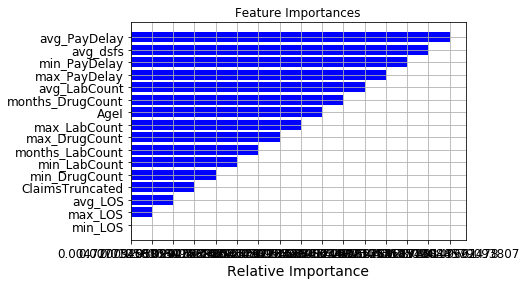

In [421]:
# Plot the feature importances of the forest
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure() 
plt.title("Feature importances")
sortedNames = np.array(sortedFeatures)[:, 1]
sortedImportances = np.array(sortedFeatures)[:, 0]

plt.title('Feature Importances')
plt.barh(range(len(sortedNames)), sortedImportances, color='b', align='center')
plt.yticks(range(len(sortedNames)), sortedNames)
plt.xlabel('Relative Importance')
plt.grid()
plt.show()